## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:

def build_mlp(input_shape, output_units=10, num_neurons=[256, 256, 128, 128], reg = 'l2', ratio = 1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    if reg == 'l2':
        for i, n_units in enumerate(num_neurons):
            if i == 0:
                x = keras.layers.Dense(units=n_units,activation="relu",name="hidden_layer"+str(i+1), 
                                       kernel_regularizer=keras.regularizers.l2(ratio))(input_layer)
            else:
                x = keras.layers.Dense(units=n_units,activation="relu",name="hidden_layer"+str(i+1),
                                       kernel_regularizer=keras.regularizers.l2(ratio))(x)
    elif reg == 'l1':
        for i, n_units in enumerate(num_neurons):
            if i == 0:
                x = keras.layers.Dense(units=n_units,activation="relu",name="hidden_layer"+str(i+1), 
                                       kernel_regularizer=keras.regularizers.l1(ratio))(input_layer)
            else:
                x = keras.layers.Dense(units=n_units,activation="relu",name="hidden_layer"+str(i+1),
                                       kernel_regularizer=keras.regularizers.l1(ratio))(x)
        
    
    output_layer = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[output_layer])
    return model

In [6]:
"""Code Here
設定超參數
"""
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
regs = {'l1':[1e-3, 1e-6, 1e-9], 'l2':[1e-3, 1e-6, 1e-9]}
REGS = list(regs.keys())
print(REGS)

['l1', 'l2']


In [9]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for REG in REGS:
    for ratio in regs[REG]:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment on %s Regulizer = %.9f" % (REG,ratio))
        model = build_mlp(input_shape=x_train.shape[1:], reg = REG, ratio=ratio)
        model.summary()
        optimizer = keras.optimizers.Adam()
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), shuffle=True)
    
    # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]
    
        exp_name_tag = "REG_%s-%s" % (str(REG),str(ratio))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment on l1 Regulizer = 0.001000000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 903,178
Trainable params: 903,178
Non-trainable params: 0
_______

Epoch 50/50
196/196 [==============================] - 3s 15ms/step - loss: 1.9881 - accuracy: 0.3594 - val_loss: 1.9908 - val_accuracy: 0.3510
Experiment on l1 Regulizer = 0.000001000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               16512     
_________________________________________________________________
o

Epoch 49/50
196/196 [==============================] - 3s 18ms/step - loss: 0.7023 - accuracy: 0.7547 - val_loss: 1.8782 - val_accuracy: 0.5000
Epoch 50/50
196/196 [==============================] - 3s 17ms/step - loss: 0.6845 - accuracy: 0.7593 - val_loss: 1.8205 - val_accuracy: 0.5001
Experiment on l1 Regulizer = 0.000000001
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_______________________________________________________

Epoch 48/50
196/196 [==============================] - 3s 17ms/step - loss: 0.6668 - accuracy: 0.7592 - val_loss: 1.8118 - val_accuracy: 0.5012
Epoch 49/50
196/196 [==============================] - 3s 17ms/step - loss: 0.6497 - accuracy: 0.7652 - val_loss: 1.8317 - val_accuracy: 0.5089
Epoch 50/50
196/196 [==============================] - 3s 16ms/step - loss: 0.6369 - accuracy: 0.7700 - val_loss: 1.8588 - val_accuracy: 0.5030
Experiment on l2 Regulizer = 0.001000000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
___________________________________________

196/196 [==============================] - 4s 18ms/step - loss: 1.3872 - accuracy: 0.5651 - val_loss: 1.5488 - val_accuracy: 0.5145
Epoch 47/50
196/196 [==============================] - 3s 17ms/step - loss: 1.3653 - accuracy: 0.5729 - val_loss: 1.4926 - val_accuracy: 0.5293
Epoch 48/50
196/196 [==============================] - 3s 17ms/step - loss: 1.3696 - accuracy: 0.5733 - val_loss: 1.4973 - val_accuracy: 0.5316
Epoch 49/50
196/196 [==============================] - 3s 17ms/step - loss: 1.3791 - accuracy: 0.5667 - val_loss: 1.5459 - val_accuracy: 0.5132
Epoch 50/50
196/196 [==============================] - 3s 18ms/step - loss: 1.3678 - accuracy: 0.5706 - val_loss: 1.4924 - val_accuracy: 0.5341
Experiment on l2 Regulizer = 0.000001000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_______________________________

Epoch 45/50
196/196 [==============================] - 3s 17ms/step - loss: 0.7443 - accuracy: 0.7346 - val_loss: 1.6934 - val_accuracy: 0.5058
Epoch 46/50
196/196 [==============================] - 4s 18ms/step - loss: 0.7329 - accuracy: 0.7394 - val_loss: 1.6940 - val_accuracy: 0.5085
Epoch 47/50
196/196 [==============================] - 3s 17ms/step - loss: 0.7093 - accuracy: 0.7461 - val_loss: 1.7669 - val_accuracy: 0.5051
Epoch 48/50
196/196 [==============================] - 3s 17ms/step - loss: 0.6951 - accuracy: 0.7525 - val_loss: 1.8187 - val_accuracy: 0.5009
Epoch 49/50
196/196 [==============================] - 3s 16ms/step - loss: 0.6909 - accuracy: 0.7552 - val_loss: 1.7574 - val_accuracy: 0.5166
Epoch 50/50
196/196 [==============================] - 3s 17ms/step - loss: 0.6826 - accuracy: 0.7584 - val_loss: 1.8739 - val_accuracy: 0.5008
Experiment on l2 Regulizer = 0.000000001
Model: "functional_1"
_________________________________________________________________
Layer (

Epoch 44/50
196/196 [==============================] - 3s 17ms/step - loss: 0.7121 - accuracy: 0.7446 - val_loss: 1.7484 - val_accuracy: 0.5134
Epoch 45/50
196/196 [==============================] - 3s 17ms/step - loss: 0.7032 - accuracy: 0.7476 - val_loss: 1.7708 - val_accuracy: 0.5222
Epoch 46/50
196/196 [==============================] - 3s 17ms/step - loss: 0.6725 - accuracy: 0.7596 - val_loss: 1.8130 - val_accuracy: 0.5099
Epoch 47/50
196/196 [==============================] - 3s 17ms/step - loss: 0.6680 - accuracy: 0.7598 - val_loss: 1.8351 - val_accuracy: 0.5103
Epoch 48/50
196/196 [==============================] - 3s 17ms/step - loss: 0.6577 - accuracy: 0.7636 - val_loss: 1.8295 - val_accuracy: 0.5099
Epoch 49/50
196/196 [==============================] - 3s 18ms/step - loss: 0.6306 - accuracy: 0.7745 - val_loss: 1.9241 - val_accuracy: 0.5131
Epoch 50/50
196/196 [==============================] - 3s 17ms/step - loss: 0.6145 - accuracy: 0.7779 - val_loss: 1.8810 - val_accuracy:

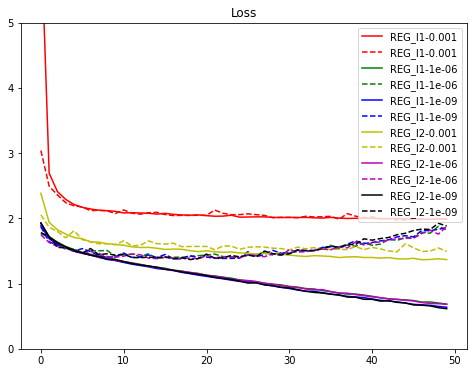

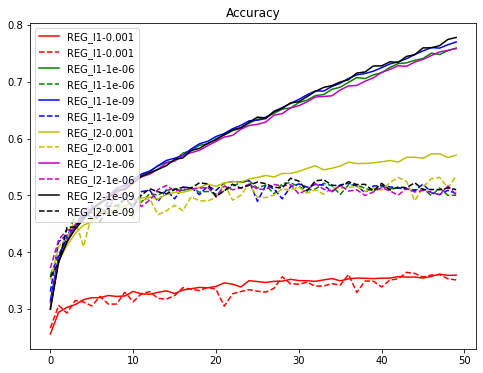

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()